<a href="https://colab.research.google.com/github/tverdnik/AudioSignalProcessingForML/blob/master/pytrochFeedFoward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataloader für h5py file


In [ ]:
import h5py
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio 
import pandas as pd
import torch
import math

from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [ ]:
def class_to_int(label_array,class_set):

  
    label2indx = {label:index for index,label in enumerate(class_set)}
    y = np.array([label2indx[label] for label in label_array])
    return y

In [ ]:
test_dataset = SpectogramDataset()
 
dataloader = DataLoader(dataset=test_dataset, batch_size=4,shuffle=True,num_workers=1)

# training loop
num_epochs=2
total_samples= len(test_dataset)
n_iterations=  math.ceil(total_samples/4)
print(total_samples, n_iterations)
for epoch in range(num_epochs):
    for i, frame in enumerate(dataloader):
        #forward backward pass update weights
        if(i+1) % 5 ==0:
            print(f'epoch {epoch +1}/{num_epochs}, step {i+1}/{n_iterations}')
                   

In [ ]:




class SpectogramDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        dir_path = "/Users/timo/Documents/BA/spectogramtest"
        os.chdir(dir_path)
        f = h5py.File('Mel_train.h5', 'r')
        self.img_dir=f["features"] 
        labels= [s.decode() for s in f['labels'][:]]
  
        class_set = set(labels)

        self.img_labels = class_to_int(labels,class_set)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_dir)

    def __getitem__(self, idx):
        
        image=self.img_dir[idx:idx+1]
        image=  torch.tensor(image)
        
        label= self.img_labels[idx:idx+1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [ ]:
test= test_dataset[1]
test

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.4549, 0.4902, 0.6706, 1.0000, 1.0000, 0.5882,
           0.3647, 0.0000, 0.0000, 0.0000, 

In [ ]:
vergleich=f["features"][0:1][0]
vergleich.shape
librosa.display.specshow(vergleich.T, y_axis='linear',x_axis="time")



NameError: name 'f' is not defined

In [ ]:
test= test_dataset[1]["image"]
frame = np.array(test)
frame


array([[[9.58848536e-01, 1.25848746e+00, 1.12037289e+00, ...,
         1.18161632e-04, 1.45824379e-04, 1.48919033e-04],
        [7.89493501e-01, 6.58169746e-01, 5.57328939e-01, ...,
         1.17469826e-04, 2.32658262e-04, 2.81570654e-04],
        [1.06244862e+00, 6.47895277e-01, 1.26562130e+00, ...,
         2.38134118e-04, 3.28926835e-04, 3.43033375e-04],
        ...,
        [5.94380021e-01, 6.61559939e-01, 1.22392130e+00, ...,
         7.94330263e-05, 1.14507988e-04, 1.27254913e-04],
        [5.39179035e-02, 4.18157011e-01, 9.76882279e-01, ...,
         8.34034508e-05, 1.34536414e-04, 1.21674726e-04],
        [4.79269296e-01, 3.49369347e-01, 4.12684232e-01, ...,
         1.02813094e-04, 7.61592091e-05, 6.06862850e-05]]], dtype=float32)

In [ ]:
import torch
import numpy as np
img_dir=hdf_train["features"] 
img_labels= hdf_train["labels"]


for frame in img_dir[0:1]:
    frame = torch.tensor(frame)
    print(frame.shape)
    frame = np.array(frame)
    librosa.display.specshow(frame.T, y_axis='linear',x_axis="time")
    plt.show()

NameError: name 'hdf_train' is not defined

# simple feed forward

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [19]:
# device config
device = 'cpu'

       
        

In [4]:
# hyperparameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001


In [5]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = './data', train = True,  transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# loaders
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True )
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False )

In [7]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


<function matplotlib.pyplot.show>

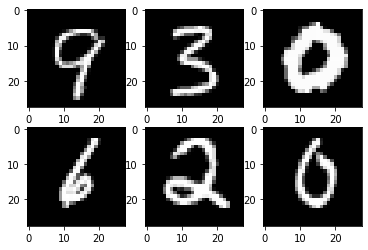

In [9]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray' )


plt.show

In [26]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):

      super( NeuralNet, self).__init__()
      self.l1 = nn.Linear(input_size, hidden_size)
      self.relu = nn.ReLU()
      self.l2 = nn.Linear( hidden_size, input_size)

    def forward (self, x):

      out = self.l1(x)
      out = self.relu(out)
      out = self.l2(out)
      return out

model = NeuralNet(input_size, hidden_size, num_classes)
print(model)

NeuralNet(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=784, bias=True)
)


In [15]:
#loss and optimizer
criterion = nn.CrossEntropyLoss() # apply Softmax dont need in model
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)



In [24]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.2707
Epoch [1/2], Step [200/600], Loss: 0.1407
Epoch [1/2], Step [300/600], Loss: 0.1325
Epoch [1/2], Step [400/600], Loss: 0.1021
Epoch [1/2], Step [500/600], Loss: 0.1965
Epoch [1/2], Step [600/600], Loss: 0.2646
Epoch [2/2], Step [100/600], Loss: 0.1471
Epoch [2/2], Step [200/600], Loss: 0.1311
Epoch [2/2], Step [300/600], Loss: 0.0782
Epoch [2/2], Step [400/600], Loss: 0.0937
Epoch [2/2], Step [500/600], Loss: 0.2869
Epoch [2/2], Step [600/600], Loss: 0.1714


In [25]:
# test loop
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')  

Accuracy of the network on the 10000 test images: 96.0 %


# simple cnn

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [28]:
device = 'cpu'
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [29]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


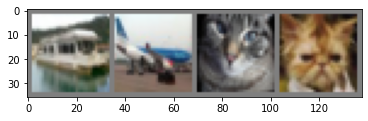

In [30]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')